# **Develop a Simple Data Analysis Application with Machine Learning model**

## **DATA INPUT**

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('/opt/StudentsPerformance.csv')

*Loading the dataset named "students performance"*

## **DATA PROCESSING**

In [7]:
df.shape

(1000, 8)

*It provides the number of rows and columns in the given dataset*

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


*This method is useful to show the first 5 rows of the dataset.*

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


*It provides the overview of the dataframe that include index range, number of entries, non-null counts, data types and memory usage.*

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


*It generates the statistics for numerical columns that includes count, mean, standard deviation, minimum value, maximum value, 25%, 50%, 25% quartiles.*

In [11]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


*It provides the number of null values in each column of the dataframe*

In [12]:
df.drop_duplicates(inplace=True)


* *It is used to remove the duplicate rows in the dataframe*
*  *Here "inplace=True" is used to replace the original df instead of assigning it in the another variable.*


In [13]:
df_encoded=pd.get_dummies(df,drop_first=True)

*It converts all the categorical columns into numerical columns.*

In [14]:
df[['math score','reading score','writing score']].mean(axis=1)

,0
0,72.666667
1,82.333333
2,92.666667
3,49.333333
4,76.333333
...,...
995,94.000000
996,57.333333
997,65.000000
998,74.333333




*  *It is used to calculate the mean value of math score, reading score and writing score of the students in the column wise.*
*  *Here "Axis=1" is used to access in the column wise.*




In [15]:
df.groupby('gender')[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


*This groups the dataframe by gender and calculate it average of math score,reading score and writing score.*

In [16]:
df.groupby('parental level of education')[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


*This groups the dataframe by parental level of education and calculate it average of math score,reading score and writing score.*

In [17]:
df.value_counts()

gender  race/ethnicity  parental level of education  lunch         test preparation course  math score  reading score  writing score
male    group E         some high school             standard      none                     94          88             78               1
female  group A         associate's degree           free/reduced  none                     37          57             56               1
                                                                                            41          51             48               1
                                                                                            65          85             76               1
                                                     standard      completed                55          65             62               1
                                                                                                                                       ..
                        high school                  standard      completed                68          80             76               1
                                                     free/reduced  completed                77          88             85               1
                                                                                            53          50             60               1
                                                                                            34          48             41               1
                        bachelor's degree            standard      none                     59          72             70               1
Name: count, Length: 1000, dtype: int64

*This method provides the unique values count of the dataframe.*

In [18]:
df.columns.unique()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

*It returns all unique column names of the dataframe.*

In [19]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

**UNIVARIATE ANALYSIS**

Text(0, 0.5, 'Frequency')

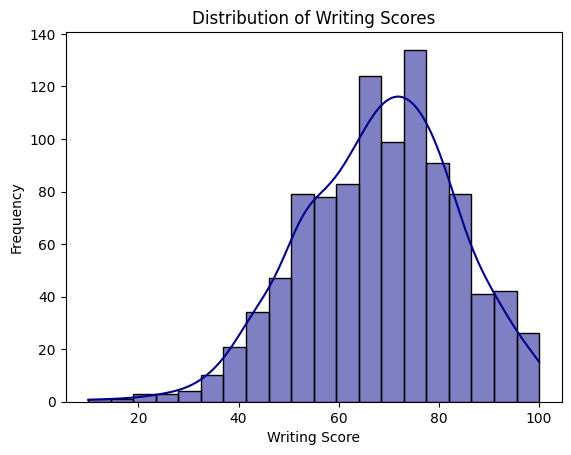

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['writing score'],bins=20,kde=True,color='darkblue')
plt.title("Distribution of Writing Scores")
plt.xlabel("Writing Score")
plt.ylabel("Frequency")

*The above histogram shows how many students performs in writing.*

<ipython-input-21-ec103a31e106>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='test preparation course',data=df, palette='Set2')


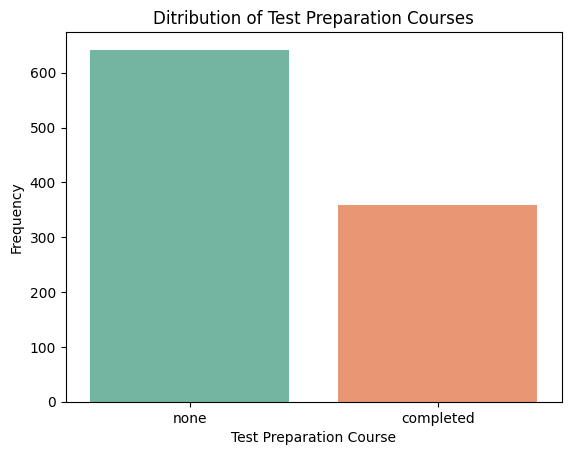

In [21]:
sns.countplot(x='test preparation course',data=df, palette='Set2')
plt.title("Ditribution of Test Preparation Courses")
plt.xlabel("Test Preparation Course")
plt.ylabel("Frequency")
plt.show()

*The countplot shows that most of the students did not completed the test preparation course only few students completed the test preparation course.*

<ipython-input-22-6348ea1e5af5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender',y='writing score',data=df, palette='Set2')


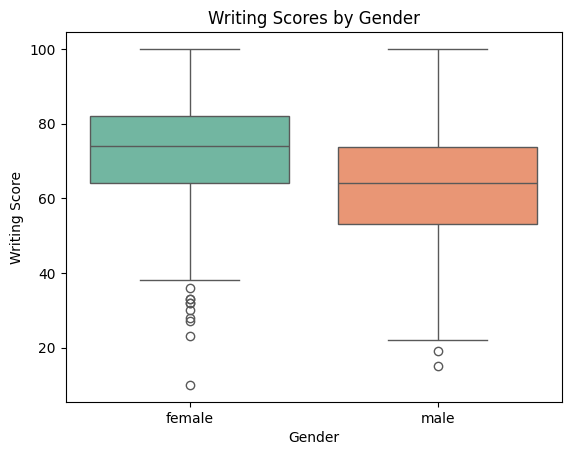

In [22]:
sns.boxplot(x='gender',y='writing score',data=df, palette='Set2')
plt.title("Writing Scores by Gender")
plt.xlabel("Gender")
plt.ylabel("Writing Score")
plt.show()



*   *It visualizes the distribution of writing scores for each gender.*
*   *It shows median, quartiles and outliers.*



Lower Bound: 25.875
Upper Bound: 110.875
Outliers:
     gender race/ethnicity parental level of education         lunch  \
59   female        group C            some high school  free/reduced   
76     male        group E            some high school      standard   
327    male        group A                some college  free/reduced   
596    male        group B                 high school  free/reduced   
980  female        group B                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
59                     none           0             17             10  
76                     none          30             26             22  
327                    none          28             23             19  
596                    none          30             24             15  
980                    none           8             24             23  


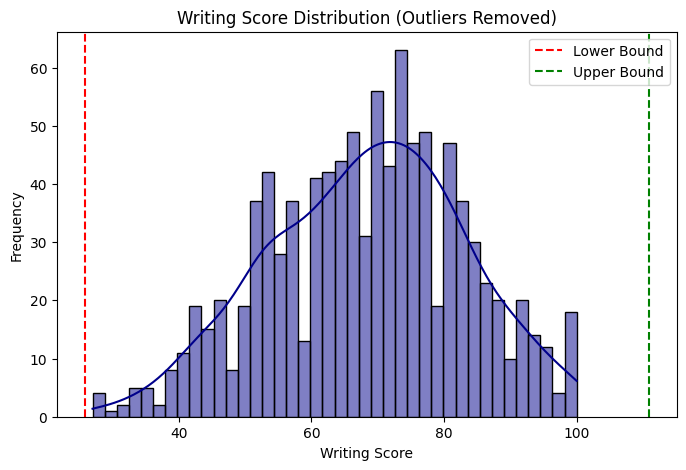

In [23]:
Q1=df['writing score'].quantile(0.25)
Q2=df['writing score'].median()
Q3=df['writing score'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=df[(df['writing score']<lower_bound) | (df['writing score']>upper_bound)]
print("Lower Bound:",lower_bound)
print("Upper Bound:",upper_bound)
print("Outliers:")
print(outliers)
outliers_removed = df[(df['writing score'] >= lower_bound) & (df['writing score'] <= upper_bound)]
plt.figure(figsize=(8, 5))
sns.histplot(outliers_removed['writing score'], bins=40, kde=True, color='darkblue')
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.title('Writing Score Distribution (Outliers Removed)')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

*The majority of scores are clustered between 60 and 90, indicating most students perform moderately to well in writing.*
*The curve is slightly skewed to the left, suggesting fewer students score on the lower end.*
*There are fewer students with very low or very high scores, which may be considered as outliers.*
*The distribution is fairly smooth, meaning the writing scores are relatively consistent across students*

## **MODEL DEVELOPMENT**

In [24]:
x=df_encoded.drop(columns=['writing score'])
y=df_encoded['writing score']

*In this, x variable contains the input features by dropping the target values. y variable contains only the target value which 'writing score'*

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



### *   *Here train_test_split() is a function from sklearn that splits the dataset into the following*:


1.  **x_train:** It contains 80 % of the input data to train the model.
2.   **x_test:** It contains 20 % of the input data to test the model.
3. **y_train:** It contains 80 % of the target variable.
4.   **y_test:** It contains 20 % of the target variable.



In [27]:
from sklearn.linear_model import LinearRegression

*Here, writing score is the continuous numeric value so we use linear regression for this dataframe*


In [28]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

*It initialize and train the model.*

In [29]:
y_pred=model.predict(x_test)

*It Predict the test data.*

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

*It shows the Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared*

## **RESULT PRESENTATION**

In [48]:
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)
print("R-squared:",r2)

Mean Absolute Error: 3.200272452120669
Mean Squared Error: 14.911021437246673
Root Mean Squared Error: 3.8614791773680035
R-squared: 0.9381328994057507


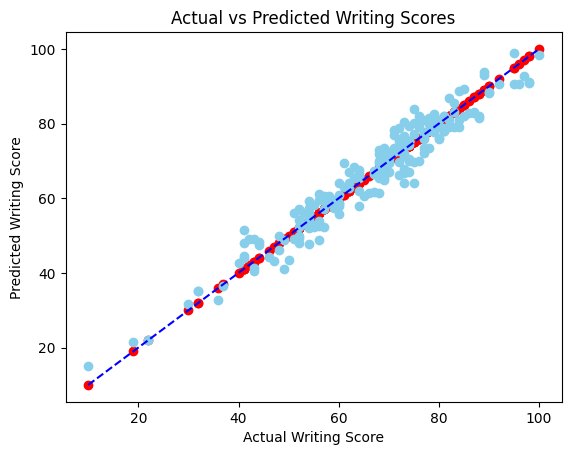

In [60]:
plt.scatter(y_test,y_test,color='red')
plt.scatter(y_test,y_pred,color='skyblue')
plt.plot([y.min(),y.max()],[y.min(),y.max()],'--b',label='perfect prediction line')
plt.xlabel("Actual Writing Score")
plt.ylabel("Predicted Writing Score")
plt.title("Actual vs Predicted Writing Scores")
plt.show()

*It shows that how well the model predicted the writing score as same as the Actual writing score*

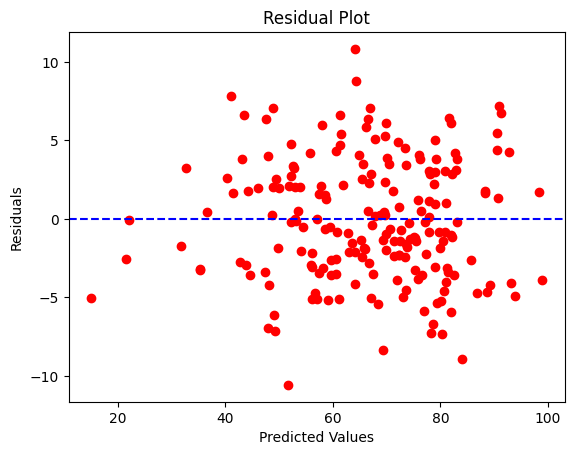

In [59]:
residuals =y_test - y_pred
plt.scatter(y_pred,residuals,color='red')
plt.axhline(y=0, color='b', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

*The residual plot helps to evaluate the performance and assumptions of your regression model.*